          Make                   Model  Year  ConsumerReviews  ConsumerRating  \
957      Honda               CR-V EX-L  2019            67500             4.8   
952      Honda                 CR-V EX  2019            30240             4.8   
1236      Jeep  Grand Cherokee Limited  2019            21280             4.8   
2284    Toyota                 RAV4 LE  2018            23870             4.8   
1195      Jeep        Cherokee Limited  2019            21016             4.6   
2300    Toyota                RAV4 XLE  2018            20790             4.8   
1022     Honda              Pilot EX-L  2019            10927             4.8   
451   Cadillac              XT5 Luxury  2019             7990             4.6   
1235      Jeep  Grand Cherokee Limited  2018            11850             4.8   
1616     Mazda      CX-5 Grand Touring  2019             9890             4.8   

      Num_Listings  Sqrt_Listings  Popularity_Score  
957            125      11.180340      3.622430e+06  


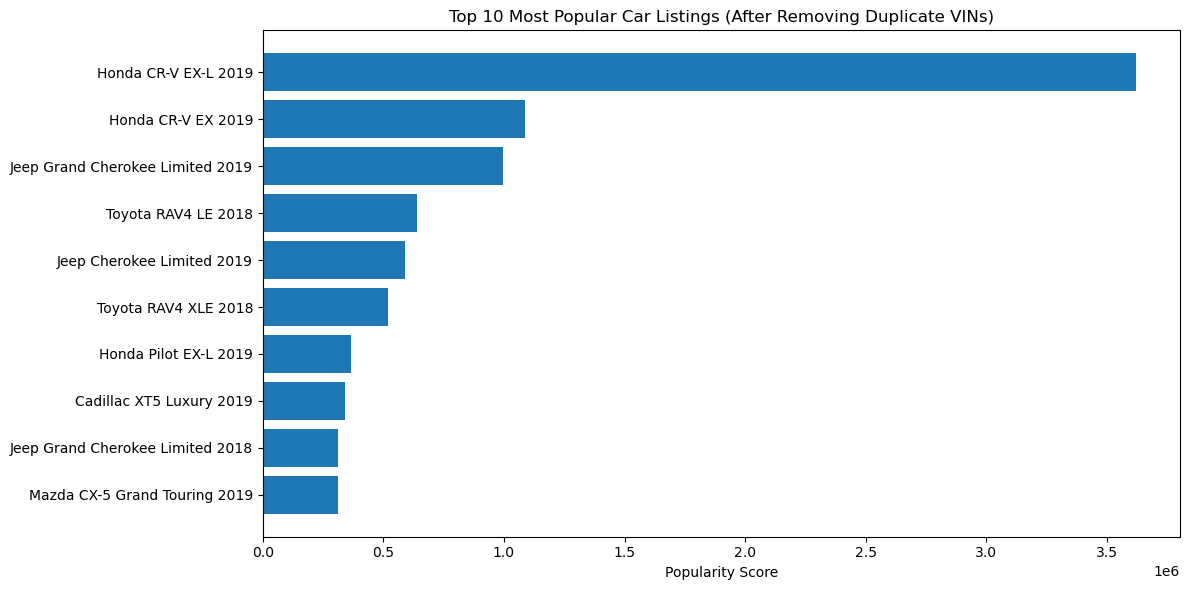

In [13]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# Remove duplicate VINs (keep first occurrence)
if 'VIN' in df.columns:
    df = df.drop_duplicates(subset='VIN', keep='first')

# Fill missing consumer reviews and ratings with 0
df[['ConsumerReviews', 'ConsumerRating']] = df[['ConsumerReviews', 'ConsumerRating']].fillna(0)

# Define how to group cars (Make, Model, Year)
group_cols = ['Make', 'Model', 'Year']

# Group the data
car_summary = df.groupby(group_cols).agg({
    'ConsumerReviews': 'sum',
    'ConsumerRating': 'mean'
}).reset_index()

# Add number of listings
car_summary['Num_Listings'] = df.groupby(group_cols).size().values

# Add square root of number of listings
car_summary['Sqrt_Listings'] = np.sqrt(car_summary['Num_Listings'])

# Calculate the Popularity Score
car_summary['Popularity_Score'] = (
    car_summary['ConsumerReviews'] *
    car_summary['ConsumerRating'] *
    car_summary['Sqrt_Listings']
)

# Sort by popularity score and get top 10
top_cars = car_summary.sort_values(by='Popularity_Score', ascending=False).head(10)

# Display the top 10
print(top_cars)

# (Optional) Plot the results
plt.figure(figsize=(12,6))
plt.barh(top_cars['Make'] + ' ' + top_cars['Model'] + ' ' + top_cars['Year'].astype(str), top_cars['Popularity_Score'])
plt.xlabel('Popularity Score')
plt.title('Top 10 Most Popular Car Listings (After Removing Duplicate VINs)')
plt.gca().invert_yaxis()  # Highest on top
plt.tight_layout()
plt.show()


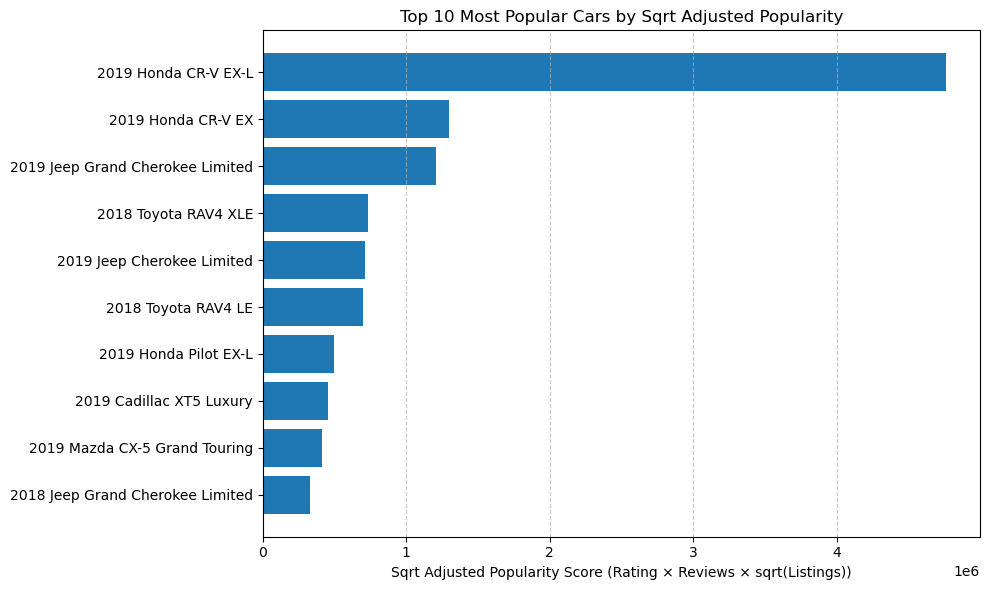

Top 10 Cars by Square Root Listings Adjusted Popularity Score:
      Year      Make                   Model  SqrtAdjustedPopularity
1336  2019     Honda               CR-V EX-L            4.761808e+06
1335  2019     Honda                 CR-V EX            1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited            1.206771e+06
1144  2018    Toyota                RAV4 XLE            7.327407e+05
1384  2019      Jeep        Cherokee Limited            7.111809e+05
1141  2018    Toyota                 RAV4 LE            7.006528e+05
1350  2019     Honda              Pilot EX-L            4.974770e+05
1252  2019  Cadillac              XT5 Luxury            4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring            4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited            3.272509e+05


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the fresh data
file_path = 'Online_Cars_Sale_Marketplace.csv'
df = pd.read_csv(file_path)

# Step 2: Clean the 'Price' column
df['Price'] = df['Price'].replace({r'\$': '', ',': '', 'Not Priced': None}, regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')

# Step 3: Group by Year, Make, Model
grouped = df.groupby(['Year', 'Make', 'Model']).agg({
    'ConsumerRating': 'mean',       # average rating
    'ConsumerReviews': 'sum',        # total reviews
    'Price': 'mean',                 # average price
    'Mileage': 'mean',               # average mileage
    'VIN': 'count'                   # number of listings
}).reset_index()

# Step 4: Rename VIN to Listings
grouped = grouped.rename(columns={'VIN': 'Listings'})

# Step 5: Create Sqrt Adjusted Popularity Score
grouped['SqrtListings'] = np.sqrt(grouped['Listings'])
grouped['SqrtAdjustedPopularity'] = grouped['ConsumerRating'] * grouped['ConsumerReviews'] * grouped['SqrtListings']

# Step 6: Sort by the new Sqrt Adjusted Popularity Score
grouped_sorted_sqrt = grouped.sort_values(by='SqrtAdjustedPopularity', ascending=False)

# Step 7: Select Top 10
top10_sqrt = grouped_sorted_sqrt.head(10).copy()

# Step 8: Create a readable label
top10_sqrt['CarLabel'] = (
    top10_sqrt['Year'].astype(str) + ' ' +
    top10_sqrt['Make'] + ' ' +
    top10_sqrt['Model']
)

# Step 9: Plot
plt.figure(figsize=(10,6))
plt.barh(top10_sqrt['CarLabel'], top10_sqrt['SqrtAdjustedPopularity'])
plt.gca().invert_yaxis()
plt.xlabel('Sqrt Adjusted Popularity Score (Rating × Reviews × sqrt(Listings))')
plt.title('Top 10 Most Popular Cars by Sqrt Adjusted Popularity')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Step 10: Display Top 10 Table
print("Top 10 Cars by Square Root Listings Adjusted Popularity Score:")
print(top10_sqrt[['Year', 'Make', 'Model', 'SqrtAdjustedPopularity']])


In [19]:
# Step 1: Sort full grouped data by SqrtAdjustedPopularity in descending order
grouped_sorted_sqrt = grouped.sort_values(by='SqrtAdjustedPopularity', ascending=False)

# Step 2: Select the Top 10 cars
top10_sqrt = grouped_sorted_sqrt.head(10).copy()

# Step 3: Display the Top 10 scores in order
print("Top 10 Cars by Square Root Listings Adjusted Popularity Score (Descending Order):")
print(top10_sqrt[['Year', 'Make', 'Model', 'SqrtAdjustedPopularity']])


Top 10 Cars by Square Root Listings Adjusted Popularity Score (Descending Order):
      Year      Make                   Model  SqrtAdjustedPopularity
1336  2019     Honda               CR-V EX-L            4.761808e+06
1335  2019     Honda                 CR-V EX            1.296122e+06
1390  2019      Jeep  Grand Cherokee Limited            1.206771e+06
1144  2018    Toyota                RAV4 XLE            7.327407e+05
1384  2019      Jeep        Cherokee Limited            7.111809e+05
1141  2018    Toyota                 RAV4 LE            7.006528e+05
1350  2019     Honda              Pilot EX-L            4.974770e+05
1252  2019  Cadillac              XT5 Luxury            4.520032e+05
1467  2019     Mazda      CX-5 Grand Touring            4.139750e+05
1023  2018      Jeep  Grand Cherokee Limited            3.272509e+05


In [29]:
import pandas as pd

# Load the dataset
dataf = pd.read_csv('Online_Cars_Sale_Marketplace.csv')

# View the first few rows
dataf.head()

# Get column data types and non-null counts
dataf.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9379 non-null   object 
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [25]:
# Check missing values
dataf.isnull().sum()


Year                       0
Make                       0
Model                      0
Used/New                   0
Price                      0
ConsumerRating             0
ConsumerReviews            0
SellerType                 0
SellerName                 0
SellerRating               0
SellerReviews              0
StreetName                 0
State                      0
Zipcode                    0
DealType                 222
ComfortRating              0
InteriorDesignRating       0
PerformanceRating          0
ValueForMoneyRating        0
ExteriorStylingRating      0
ReliabilityRating          0
ExteriorColor              0
InteriorColor              0
Drivetrain                 0
MinMPG                     0
MaxMPG                     0
FuelType                   0
Transmission               0
Engine                     0
VIN                        0
Stock#                     0
Mileage                    0
dtype: int64

In [27]:
# Check duplicated rows
dataf.duplicated().sum()


872

In [31]:
# Show unique DealType values
dataf['DealType'].unique()


array(['Great', 'Good', nan, 'Fair'], dtype=object)

In [33]:
# Show value counts for DealType
dataf['DealType'].value_counts()



DealType
Good     5524
Great    2408
Fair     1225
Name: count, dtype: int64

In [39]:
# Fill NaN values in DealType with 'Missing'
dataf['DealType'] = dataf['DealType'].fillna('Missing')

# Show unique DealType values
dataf['DealType'].unique()

array(['Great', 'Good', 'Missing', 'Fair'], dtype=object)

In [35]:
# Check duplicated rows
dataf.duplicated().sum()



872

In [41]:
# View duplicated rows only
duplicated_rows = dataf[dataf.duplicated()]

# Show them
duplicated_rows


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
1645,2019,Buick,Encore Preferred,Used,"$23,999",4.7,182,Dealer,AutoNation CDJR FIAT North Columbus,4.4,...,–,Front-wheel Drive,25,30,Gasoline,6-Speed Automatic,1.4L I4 16V MPFI DOHC Turbo,KL4CJASB9KB761738,KB761738,19843
1701,2020,Tesla,Model Y Long Range,Used,"$68,981",3.7,10,Dealer,Surprise Ford,2.8,...,Black,All-wheel Drive,127,114,Electric,1-Speed Automatic,Electric,5YJYGDEE2LF035154,P3392,15614
1723,2017,Subaru,Impreza 2.0i,Used,"$16,823",4.8,175,Dealer,North Imports,4.5,...,Ivory,All-wheel Drive,28,38,Gasoline,CVT 7-Speed,4 Cylinder Engine,4S3GKAA68H3601314,1314,40060
1737,2019,INFINITI,QX80 Luxe,Used,"$52,506",4.8,26,Dealer,Ford of Franklin,4.8,...,Saddle Brown,Rear-wheel Drive,14,20,Gasoline,7-Speed Automatic,5.6L V8 32V GDI DOHC,JN8AZ2NF1K9688029,EL09626B,27017
1766,2017,Mercedes-Benz,GLS 450 Base 4MATIC,Used,"$44,995",4.9,37,Dealer,AutoNation Ford Miami,4.7,...,–,All-wheel Drive,19,22,Gasoline,9-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,4JGDF6EE8HA966203,HA966203,36888
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9245,2020,INFINITI,QX50 Luxe,INFINITI Certified,"$36,205",4.6,23,Dealer,INFINITI of Tampa,4.5,...,Graphite,Front-wheel Drive,23,29,Gasoline,Automatic CVT,2.0L I4 16V PDI DOHC Turbo,3PCAJ5M18LF110978,CMT222436A,19123
9305,2015,Chrysler,200 Limited,Used,"$4,250",4.4,361,Dealer,Texas Best Deal Autos,1.8,...,Black,Front-wheel Drive,23,36,Gasoline,9-Speed Automatic,2.4L I4 16V MPFI SOHC,1C3CCCAB0FN698261,698261,119417
9319,2017,Mercedes-Benz,GLS 450 Base 4MATIC,Used,"$44,762",4.9,37,Dealer,Autohaus on Edens,4.7,...,Black,All-wheel Drive,19,22,Gasoline,9-Speed Automatic,3.0L V6 24V GDI DOHC Twin Turbo,4JGDF6EE7HA994803,62-810A,49001
9335,2018,Ford,F-150 Lariat,Used,"$47,989",4.8,817,Dealer,Carolina Ford,3.0,...,Medium Earth Gray,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,5.0L V8 32V PDI DOHC,1FTEW1E53JFC09875,1462A,36000


In [43]:
# Show all duplicate groups (original and duplicate rows together)
duplicated_rows = dataf[dataf.duplicated(keep=False)]

# Display them
duplicated_rows.sort_values(by=list(dataf.columns)).reset_index(drop=True)


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2004,Toyota,Highlander Base,Used,"$5,995",4.5,47,Dealer,Northtown Auto Sales,4.9,...,Tan,Front-wheel Drive,23,23,Gasoline,Automatic 5-Speed,3.3L V6,JTEGP21A740039991,40039991STK,204440
1,2004,Toyota,Highlander Base,Used,"$5,995",4.5,47,Dealer,Northtown Auto Sales,4.9,...,Tan,Front-wheel Drive,23,23,Gasoline,Automatic 5-Speed,3.3L V6,JTEGP21A740039991,40039991STK,204440
2,2005,Acura,MDX Touring,Used,"$6,495",4.7,54,Dealer,JP Motors,4.3,...,Ebony,Four-wheel Drive,17,23,Gasoline,5-Speed Automatic,3.5L V6 24V MPFI SOHC,2HNYD188X5H549256,2P771090,174916
3,2005,Acura,MDX Touring,Used,"$6,495",4.7,54,Dealer,JP Motors,4.3,...,Ebony,Four-wheel Drive,17,23,Gasoline,5-Speed Automatic,3.5L V6 24V MPFI SOHC,2HNYD188X5H549256,2P771090,174916
4,2007,Toyota,Camry LE,Used,"$9,950",4.2,301,Dealer,TJK AUTO LLC,4.1,...,Tan,Front-wheel Drive,22,31,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,4T1BK46K87U548913,548913,99223
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1733,2022,Tesla,Model 3 Long Range,Used,"$66,237",4.8,2,Dealer,Napleton's Volkswagen of Sanford,4.6,...,Black,All-wheel Drive,0,0,Electric,Automatic,Electric,5YJ3E1EB0NF119495,ZNF119495P,2224
1734,2022,Toyota,Highlander Hybrid Limited,Used,"$52,955",5.0,2,Dealer,AutoNation Toyota Hayward,4.4,...,–,All-wheel Drive,35,34,Hybrid,Automatic CVT,2.5L I4 16V PDI DOHC Hybrid,5TDXBRCH7NS543753,NS543753,29994
1735,2022,Toyota,Highlander Hybrid Limited,Used,"$52,955",5.0,2,Dealer,AutoNation Toyota Hayward,4.4,...,–,All-wheel Drive,35,34,Hybrid,Automatic CVT,2.5L I4 16V PDI DOHC Hybrid,5TDXBRCH7NS543753,NS543753,29994
1736,2022,Volvo,XC60 B5 Inscription,Used,"$48,500",2.7,1,Dealer,Volvo Cars Mall of Georgia,4.9,...,Blonde,Front-wheel Drive,23,30,Gasoline,8-Speed Automatic,2.0L I4 16V GDI DOHC Turbo,YV4L12DL6N1951540,LC422005B,18310


In [45]:
# Drop exact duplicated rows
dataf = dataf.drop_duplicates()

# Reset index for cleanliness
dataf = dataf.reset_index(drop=True)

# Confirm no duplicates remain
print('Remaining duplicated rows:', dataf.duplicated().sum())


Remaining duplicated rows: 0


In [47]:
# Check how many VINs are duplicated
vin_duplicates = dataf[dataf['VIN'].duplicated(keep=False)]

# Show them sorted nicely
vin_duplicates.sort_values(by='VIN').reset_index(drop=True)


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Jeep,Grand Cherokee Limited,Used,"$35,500",4.8,224,Dealer,Scott Clark Toyota,4.7,...,Black,Four-wheel Drive,18,25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,1C4RJFBG0KC555534,SH55534,32858
1,2019,Jeep,Grand Cherokee Limited,Used,"$35,500",4.8,224,Dealer,Scott Clark Toyota,4.7,...,Black,Four-wheel Drive,18,25,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,1C4RJFBG0KC555534,SH55534,32858
2,2020,RAM,1500 Classic SLT,Used,"$39,000",4.7,20,Dealer,"Nyhus Family Sales, Inc.",4.9,...,Diesel Gray / Black,Four-wheel Drive,16,23,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,1C6RR7GGXLS109543,109543,13185
3,2020,RAM,1500 Classic SLT,Used,"$39,000",4.7,20,Dealer,"Nyhus Family Sales, Inc.",4.9,...,Diesel Gray / Black,Four-wheel Drive,16,23,Gasoline,8-Speed Automatic,3.6L V6 24V MPFI DOHC,1C6RR7GGXLS109543,109543,13326
4,2018,Ford,Explorer XLT,Used,"$29,749",4.8,265,Dealer,EchoPark Automotive Greensboro Delivery Center,1.3,...,Ebony Black,Four-wheel Drive,16,22,Gasoline,6-Speed Automatic,3.5L V6 24V MPFI DOHC,1FM5K8D87JGA12701,CJGA12701,48001
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,2019,Mercedes-Benz,AMG E 63 S 4MATIC,Mercedes-Benz Certified,"$99,980",5.0,2,Dealer,House of Imports,4.7,...,–,All-wheel Drive,15,23,Gasoline,9-Speed Automatic,4.0L V8 32V GDI DOHC Twin Turbo,WDDZF8KB5KA547464,KA547464,19351
62,2014,Volvo,S60 T5,Used,"$18,498",4.8,35,Dealer,Herb Connolly Hyundai,4.6,...,Soft Beige,Front-wheel Drive,21,30,Gasoline,6-Speed Automatic,2.5L I5 20V MPFI DOHC Turbo,YV1612FS5E1290176,H024003A,55515
63,2014,Volvo,S60 T5,Used,"$18,498",4.8,35,Dealer,Herb Connolly Hyundai,4.6,...,Soft Beige,Front-wheel Drive,21,30,Gasoline,6-Speed Automatic,2.5L I5 20V MPFI DOHC Turbo,YV1612FS5E1290176,H024003A,55515
64,2017,Alfa,Romeo Giulia Ti,Used,"$29,900",4.7,98,Private,Tom,4.7,...,Black,All-wheel Drive,23,31,Gasoline Fuel,Transmission w/Dual Shift Mode,280.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,ZARFAEEN7H7551320,–,22855


In [49]:
# Drop duplicated VINs, keep the first occurrence
dataf = dataf.drop_duplicates(subset='VIN', keep='first')

# Reset index for cleanliness
dataf = dataf.reset_index(drop=True)

# Double-check no VIN duplicates remain
print('Remaining duplicated VINs:', dataf['VIN'].duplicated().sum())


Remaining duplicated VINs: 0


In [53]:
# Create a cleaned copy
c_dataf = dataf.copy()


In [55]:
c_dataf


,Year,Make,Model,Used/New,Price,ConsumerRating,ConsumerReviews,SellerType,SellerName,SellerRating,...,InteriorColor,Drivetrain,MinMPG,MaxMPG,FuelType,Transmission,Engine,VIN,Stock#,Mileage
0,2019,Toyota,Sienna SE,Used,"$39,998",4.6,45,Dealer,CarMax Murrieta - Now offering Curbside Pickup...,3.3,...,Black,Front-wheel Drive,19,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,5TDXZ3DC2KS015402,22998646,29403
1,2018,Ford,F-150 Lariat,Used,"$49,985",4.8,817,Dealer,Giant Chevrolet,4.8,...,Black,Four-wheel Drive,19,24,Gasoline,10-Speed Automatic,3.5L V6 24V PDI DOHC Twin Turbo,1FTEW1EG2JFD44217,22418A,32929
2,2017,RAM,1500 Laramie,Used,"$41,860",4.7,495,Dealer,Gill Auto Group Madera,4.6,...,Black,Four-wheel Drive,15,21,Gasoline,8-Speed Automatic,5.7L V8 16V MPFI OHV,1C6RR7VT5HS842283,NG277871G,23173
3,2021,Honda,Accord Sport SE,Used,"$28,500",5.0,36,Dealer,AutoSavvy Las Vegas,4.6,...,–,Front-wheel Drive,29,35,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,1HGCV1F49MA038035,54237,10598
4,2020,Lexus,RX 350,Used,"$49,000",4.8,76,Dealer,Lexus of Henderson,4.8,...,Birch,Front-wheel Drive,20,27,Gasoline,8-Speed Automatic,3.5L V6 24V PDI DOHC,2T2AZMAA8LC156270,HDT4181A,28137
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8469,2019,Honda,CR-V EX-L,Used,"$31,999",4.8,540,Dealer,Hoffman Honda,4.8,...,–,All-wheel Drive,27,33,Gasoline,Automatic CVT,1.5L I4 16V GDI DOHC Turbo,2HKRW2H87KH643043,10553HB,44481
8470,2019,Subaru,Crosstrek 2.0i Premium,Used,"$27,374",4.7,205,Dealer,Bertera Subaru of West Springfield,4.4,...,Gray,All-wheel Drive,27,33,Gasoline,Automatic CVT,2.0L H4 16V GDI DOHC,JF2GTADC4KH318032,220502A,15606
8471,2017,Buick,Enclave Leather,Used,"$26,944",4.8,137,Dealer,Tulley Automotive Group,4.7,...,Ebony,All-wheel Drive,15,22,Gasoline,6-Speed Automatic,3.6L V6 24V GDI DOHC,5GAKVBKD4HJ190334,B221381B,62649
8472,2019,Subaru,Forester Premium,Used,"$28,568",4.7,279,Dealer,Ira Subaru,4.4,...,Black,All-wheel Drive,26,33,Gasoline,Automatic CVT,2.5L H4 16V GDI DOHC,JF2SKAGC9KH423450,KH423450,30760


In [57]:
# List all columns with 'Rating' in their name
rating_columns = [col for col in c_dataf.columns if 'Rating' in col]

# Show them
rating_columns


['ConsumerRating',
 'SellerRating',
 'ComfortRating',
 'InteriorDesignRating',
 'PerformanceRating',
 'ValueForMoneyRating',
 'ExteriorStylingRating',
 'ReliabilityRating']

In [59]:
# Display only the columns that have 'Rating' in their name
c_dataf[rating_columns].head()


,ConsumerRating,SellerRating,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating
0,4.6,3.3,4.7,4.6,4.6,4.4,4.6,4.7
1,4.8,4.8,4.9,4.8,4.8,4.6,4.8,4.7
2,4.7,4.6,4.8,4.7,4.8,4.6,4.8,4.7
3,5.0,4.6,4.9,5.0,4.9,5.0,5.0,5.0
4,4.8,4.8,4.9,4.8,4.8,4.7,4.8,4.9


In [74]:
# 1. Find all Rating columns
rating_columns = [col for col in c_dataf.columns if 'Rating' in col]

# 2. Group by Year, Make, Model and take the mean of rating columns
grouped_ratings = c_dataf.groupby(['Year', 'Make', 'Model'])[rating_columns].mean().reset_index()

# 3. Create a new column: Super_Avg_Rating = average of all rating columns
grouped_ratings['Super_Avg_Rating'] = grouped_ratings[rating_columns].mean(axis=1)

# 4. Sort by Super_Avg_Rating descending (highest first)
top_cars_by_super_rating = grouped_ratings.sort_values(by='Super_Avg_Rating', ascending=False)

# 5. Show top 10
top_cars_by_super_rating.head(10)


,Year,Make,Model,ConsumerRating,SellerRating,ComfortRating,InteriorDesignRating,PerformanceRating,ValueForMoneyRating,ExteriorStylingRating,ReliabilityRating,Super_Avg_Rating
1436,2019,Lexus,LC 500 Base,5.0,4.90,5.0,5.0,5.0,5.0,5.0,5.0,4.98750
2412,2021,Volvo,XC90 T5 Momentum 7 Passenger,5.0,4.90,5.0,5.0,5.0,5.0,5.0,5.0,4.98750
2152,2021,Ford,Expedition Limited,5.0,4.90,5.0,5.0,5.0,5.0,5.0,5.0,4.98750
2424,2022,Chevrolet,Tahoe LT,5.0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,4.97500
1884,2020,Lexus,GS 350 F Sport,5.0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,4.97500
2270,2021,Lincoln,Navigator Black Label,5.0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,4.97500
1929,2020,Mercedes-Benz,E-Class E 450 4MATIC,5.0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,4.97500
2113,2021,Cadillac,Escalade ESV Premium Luxury,5.0,4.80,5.0,5.0,5.0,5.0,5.0,5.0,4.97500
1664,2020,BMW,740 i,5.0,4.75,5.0,5.0,5.0,5.0,5.0,5.0,4.96875
1919,2020,Mercedes-Benz,A-Class A 220,5.0,4.70,5.0,5.0,5.0,5.0,5.0,5.0,4.96250


In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9379 entries, 0 to 9378
Data columns (total 32 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   9379 non-null   int64  
 1   Make                   9379 non-null   object 
 2   Model                  9379 non-null   object 
 3   Used/New               9379 non-null   object 
 4   Price                  9374 non-null   float64
 5   ConsumerRating         9379 non-null   float64
 6   ConsumerReviews        9379 non-null   int64  
 7   SellerType             9379 non-null   object 
 8   SellerName             9379 non-null   object 
 9   SellerRating           9379 non-null   float64
 10  SellerReviews          9379 non-null   int64  
 11  StreetName             9379 non-null   object 
 12  State                  9379 non-null   object 
 13  Zipcode                9379 non-null   object 
 14  DealType               9157 non-null   object 
 15  Comf

In [78]:
# 1. Find all Review columns
review_columns = [col for col in c_dataf.columns if 'Review' in col or 'Reviews' in col]

# 2. Group by Year, Make, Model and sum the review columns
grouped_reviews = c_dataf.groupby(['Year', 'Make', 'Model'])[review_columns].sum().reset_index()

# 3. Create a new column: Total_Reviews = sum of all review columns
grouped_reviews['Total_Reviews'] = grouped_reviews[review_columns].sum(axis=1)

# 4. Sort by Total_Reviews descending (highest first)
top_cars_by_reviews = grouped_reviews.sort_values(by='Total_Reviews', ascending=False)

# 5. Show top 10
top_cars_by_reviews.head(10)


,Year,Make,Model,ConsumerReviews,SellerReviews,Total_Reviews
1336,2019,Honda,CR-V EX-L,67500,222638,290138
1390,2019,Jeep,Grand Cherokee Limited,21280,128033,149313
1335,2019,Honda,CR-V EX,30240,83562,113802
1232,2019,BMW,X5 xDrive40i,5445,90042,95487
1384,2019,Jeep,Cherokee Limited,21016,68521,89537
1252,2019,Cadillac,XT5 Luxury,7990,71891,79881
1350,2019,Honda,Pilot EX-L,10927,62758,73685
1841,2020,Jeep,Grand Cherokee Limited,6750,62214,68964
1144,2018,Toyota,RAV4 XLE,20790,44975,65765
1141,2018,Toyota,RAV4 LE,23870,38498,62368


In [80]:
# 1. Group by Year, Make, Model and sum ConsumerReviews
grouped_consumer_reviews = c_dataf.groupby(['Year', 'Make', 'Model'])['ConsumerReviews'].sum().reset_index()

# 2. Sort by ConsumerReviews descending (highest first)
top_cars_by_consumer_reviews = grouped_consumer_reviews.sort_values(by='ConsumerReviews', ascending=False)

# 3. Show top 10
top_cars_by_consumer_reviews.head(10)


,Year,Make,Model,ConsumerReviews
1336,2019,Honda,CR-V EX-L,67500
1335,2019,Honda,CR-V EX,30240
1141,2018,Toyota,RAV4 LE,23870
1390,2019,Jeep,Grand Cherokee Limited,21280
1384,2019,Jeep,Cherokee Limited,21016
1144,2018,Toyota,RAV4 XLE,20790
1023,2018,Jeep,Grand Cherokee Limited,11850
1350,2019,Honda,Pilot EX-L,10927
969,2018,Ford,F-150 Lariat,10621
1467,2019,Mazda,CX-5 Grand Touring,9890


In [90]:
# 1. Group by Year, Make, Model and average ConsumerRating
grouped_consumer_rating = c_dataf.groupby(['Year', 'Make', 'Model'])['ConsumerRating'].mean().reset_index()

# 2. Sort by ConsumerRating descending (highest first)
top_cars_by_consumer_rating = grouped_consumer_rating.sort_values(by='ConsumerRating', ascending=False)

# 3. Show top 10
top_cars_by_consumer_rating.head(90)


,Year,Make,Model,ConsumerRating
1958,2020,Nissan,Maxima 3.5 SR,5.0
2181,2021,Honda,Accord Sport 2.0T,5.0
2461,2022,Toyota,Corolla LE,5.0
1779,2020,GMC,Sierra 3500 Denali,5.0
1316,2019,Ford,Transit-250 Base,5.0
...,...,...,...,...
1762,2020,Ford,Fusion Hybrid Titanium,5.0
1658,2020,Audi,Q7 55 quattro Premium Plus,5.0
2430,2022,Honda,Civic Sport,5.0
2428,2022,Genesis,GV70 3.5T Sport,5.0


In [92]:
# Check unique values in 'Used/New' column
c_dataf['Used/New'].unique()


array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

In [94]:
# Rename 'Used/New' column to 'Used/Certified Used'
c_dataf = c_dataf.rename(columns={'Used/New': 'Used/Certified Used'})

# Double-check
c_dataf['Used/Certified Used'].unique()


array(['Used', 'Dodge Certified', 'Acura Certified', 'Honda Certified',
       'Mercedes-Benz Certified', 'Ford Certified', 'Toyota Certified',
       'BMW Certified', 'Porsche Certified', 'Cadillac Certified',
       'Volvo Certified', 'Nissan Certified', 'Subaru Certified',
       'Volkswagen Certified', 'INFINITI Certified',
       'Chevrolet Certified', 'Kia Certified', 'RAM Certified',
       'Jeep Certified', 'GMC Certified', 'Buick Certified',
       'Alfa Romeo Certified', 'Bentley Certified', 'MINI Certified',
       'Ferrari Certified', 'Maserati Certified'], dtype=object)

In [104]:
# 1. Group necessary columns
grouped_scores = c_dataf.groupby(['Year', 'Make', 'Model']).agg({
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'SellerRating': 'mean',
    'SellerReviews': 'sum'
}).reset_index()

# 2. Create Consumer Popularity Score
grouped_scores['Consumer_Popularity_Score'] = grouped_scores['ConsumerRating'] * grouped_scores['ConsumerReviews']

# 3. Create Seller Popularity Score
grouped_scores['Seller_Popularity_Score'] = grouped_scores['SellerRating'] * grouped_scores['SellerReviews']

# 4. Sort the table in **descending** order by Consumer_Popularity_Score
grouped_scores = grouped_scores.sort_values(by='Consumer_Popularity_Score', ascending=False).reset_index(drop=True)

# 5. View the first few rows
grouped_scores.head(20)


,Year,Make,Model,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,Consumer_Popularity_Score,Seller_Popularity_Score
0,2019,Honda,CR-V EX-L,4.8,67500,4.605600,222638,324000.0,1.025382e+06
1,2019,Honda,CR-V EX,4.8,30240,4.637500,83562,145152.0,3.875188e+05
2,2018,Toyota,RAV4 LE,4.8,23870,4.493548,38498,114576.0,1.729926e+05
3,2019,Jeep,Grand Cherokee Limited,4.8,21280,4.453684,128033,102144.0,5.702186e+05
4,2018,Toyota,RAV4 XLE,4.8,20790,4.437037,44975,99792.0,1.995557e+05
5,2019,Jeep,Cherokee Limited,4.6,21016,4.264865,68521,96673.6,2.922328e+05
6,2018,Jeep,Grand Cherokee Limited,4.8,11850,4.426667,27175,56880.0,1.202947e+05
7,2019,Honda,Pilot EX-L,4.8,10927,4.604082,62758,52449.6,2.889430e+05
8,2018,Ford,F-150 Lariat,4.8,10621,4.176923,26634,50980.8,1.112482e+05
9,2019,Mazda,CX-5 Grand Touring,4.8,9890,4.565116,28719,47472.0,1.311056e+05


In [106]:
# 1. Create a Total Popularity Score
grouped_scores['Total_Popularity_Score'] = grouped_scores['Consumer_Popularity_Score'] + grouped_scores['Seller_Popularity_Score']

# 2. Sort by Total Popularity Score in descending order
grouped_scores = grouped_scores.sort_values(by='Total_Popularity_Score', ascending=False).reset_index(drop=True)

# 3. View the top 10
grouped_scores[['Year', 'Make', 'Model', 'Total_Popularity_Score']].head(10)


,Year,Make,Model,Total_Popularity_Score
0,2019,Honda,CR-V EX-L,1.349382e+06
1,2019,Jeep,Grand Cherokee Limited,6.723626e+05
2,2019,Honda,CR-V EX,5.326708e+05
3,2019,BMW,X5 xDrive40i,4.315991e+05
4,2019,Jeep,Cherokee Limited,3.889064e+05
5,2019,Cadillac,XT5 Luxury,3.604327e+05
6,2019,Honda,Pilot EX-L,3.413926e+05
7,2020,Jeep,Grand Cherokee Limited,3.156811e+05
8,2018,Toyota,RAV4 XLE,2.993477e+05
9,2018,Toyota,RAV4 LE,2.875686e+05


In [108]:
# 1. Group necessary columns
grouped_scores = c_dataf.groupby(['Year', 'Make', 'Model']).agg({
    'ConsumerRating': 'mean',
    'ConsumerReviews': 'sum',
    'SellerRating': 'mean',
    'SellerReviews': 'sum',
    'Used/Certified Used': lambda x: x.mode()[0]  # Get the most common value
}).reset_index()

# 2. Create Consumer Popularity Score
grouped_scores['Consumer_Popularity_Score'] = grouped_scores['ConsumerRating'] * grouped_scores['ConsumerReviews']

# 3. Create Seller Popularity Score
grouped_scores['Seller_Popularity_Score'] = grouped_scores['SellerRating'] * grouped_scores['SellerReviews']

# 4. Create Total Popularity Score
grouped_scores['Total_Popularity_Score'] = grouped_scores['Consumer_Popularity_Score'] + grouped_scores['Seller_Popularity_Score']

# 5. Sort by Total Popularity Score in descending order
grouped_scores = grouped_scores.sort_values(by='Total_Popularity_Score', ascending=False).reset_index(drop=True)

# 6. View top 10
grouped_scores[['Year', 'Make', 'Model', 'Used/Certified Used', 'Total_Popularity_Score']].head(10)


,Year,Make,Model,Used/Certified Used,Total_Popularity_Score
0,2019,Honda,CR-V EX-L,Honda Certified,1.349382e+06
1,2019,Jeep,Grand Cherokee Limited,Used,6.723626e+05
2,2019,Honda,CR-V EX,Used,5.326708e+05
3,2019,BMW,X5 xDrive40i,Used,4.315991e+05
4,2019,Jeep,Cherokee Limited,Used,3.889064e+05
5,2019,Cadillac,XT5 Luxury,Used,3.604327e+05
6,2019,Honda,Pilot EX-L,Used,3.413926e+05
7,2020,Jeep,Grand Cherokee Limited,Used,3.156811e+05
8,2018,Toyota,RAV4 XLE,Used,2.993477e+05
9,2018,Toyota,RAV4 LE,Used,2.875686e+05


In [110]:
grouped_scores.head(1)

,Year,Make,Model,ConsumerRating,ConsumerReviews,SellerRating,SellerReviews,Used/Certified Used,Consumer_Popularity_Score,Seller_Popularity_Score,Total_Popularity_Score
0,2019,Honda,CR-V EX-L,4.8,67500,4.6056,222638,Honda Certified,324000.0,1.025382e+06,1.349382e+06
